## **KNN for Anomaly Detection**

## Step 1: Import the Required Libraries and Load the Data

- Import the **pandas, NumPy, matplotlib.pyplot, and sklearn.neighbors** libraries
- Load the **iris** dataset and create a DataFrame with only **sepal_length** and **sepal_width** columns


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [88]:
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

df = data[["sepal_length", "sepal_width"]]

## Step 2: Plot the Input Data

- Create a scatterplot of the input data


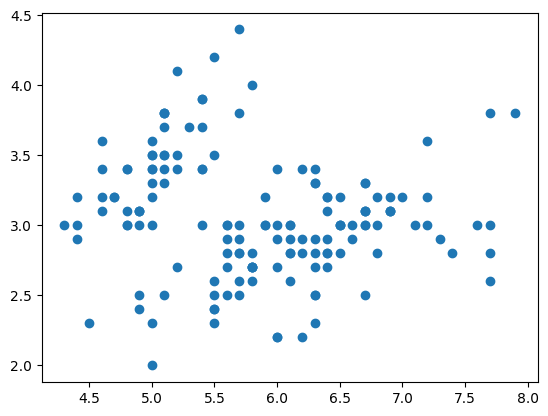

In [89]:
plt.scatter(df["sepal_length"], df["sepal_width"])

__Observations:__
- Here, we can see the scatter plot of sepal length and sepal width.
- We may observe some anomalies in the data, so let’s try KNN to identify them.

## Step 3: Instantiate and Fit the Nearest Neighbors Model

- Create an array for the input data
- Instantiate the NearestNeighbors model with 3 neighbors
- Fit the model to the input data

In [90]:
X = df.values
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [91]:
# K=3 means we will compare the distance from each data point to it 3 closests points.
k=3
nbrs = NearestNeighbors(n_neighbors = k)
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

## Step 4: Calculate the Mean Distances and Determine the Cutoff Value

- Get the distances and indexes of the k-nearest neighbors from the model output
- Calculate the mean of the k-distances for each observation
- Plot the mean distances
- Determine the cutoff value for outliers (e.g., > 0.20)


In [92]:
distances, indexes = nbrs.kneighbors(X)
distances.mean(axis =1)

array([0.03333333, 0.06666667, 0.03333333, 0.08047379, 0.06666667,
       0.06666667, 0.13333333, 0.03333333, 0.08047379, 0.        ,
       0.1       , 0.06666667, 0.03333333, 0.08047379, 0.19472064,
       0.23171776, 0.06666667, 0.03333333, 0.17994485, 0.        ,
       0.04714045, 0.06666667, 0.16094757, 0.06666667, 0.06666667,
       0.08047379, 0.03333333, 0.06666667, 0.06666667, 0.03333333,
       0.06666667, 0.04714045, 0.18856181, 0.19969016, 0.        ,
       0.08047379, 0.0942809 , 0.        , 0.06666667, 0.06666667,
       0.03333333, 0.28650805, 0.13333333, 0.03333333, 0.        ,
       0.03333333, 0.        , 0.06666667, 0.1       , 0.06666667,
       0.08047379, 0.03333333, 0.        , 0.06666667, 0.06666667,
       0.03333333, 0.03333333, 0.08047379, 0.08047379, 0.17994485,
       0.23743685, 0.03333333, 0.06666667, 0.06666667, 0.06666667,
       0.        , 0.03333333, 0.        , 0.11380712, 0.06666667,
       0.13333333, 0.03333333, 0.06666667, 0.03333333, 0.06666

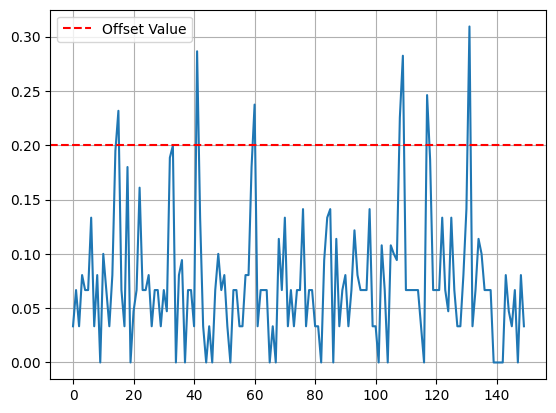

In [93]:

outlier_offset = 0.20

plt.plot(distances.mean(axis =1))

# Highlight the offset value with a horizontal line
plt.axhline(y=outlier_offset, color='r', linestyle='--', label='Offset Value')

plt.legend()

# Show plot
plt.grid(True)
plt.show()

__Observations:__
- Here, we can see the mean distance from the k-neighbors.
- The point above 0.15 is considered an anomaly.


In [94]:
outlier_index = np.where(distances.mean(axis = 1) > outlier_offset)
outlier_index

(array([ 15,  41,  60, 108, 109, 117, 131]),)

__Observation:__
- These are the arrays that have anomalies.

## Step 5: Filter and Plot the Outlier Values

- Filter the outlier values from the original data
- Plot the original data and the outlier values in different colors


In [95]:
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
15,5.7,4.4
41,4.5,2.3
60,5.0,2.0
108,6.7,2.5
109,7.2,3.6
117,7.7,3.8
131,7.9,3.8


__Observation:__
- These are the values of the outliers for the arrays with anomalies.

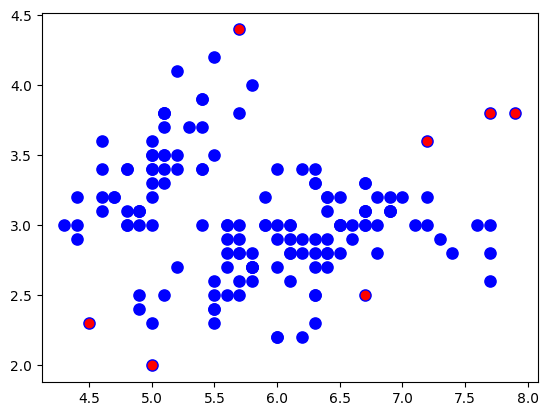

In [96]:
plt.scatter(df["sepal_length"], df["sepal_width"], color = "b", s = 65)
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "r")

__Observations:__
- Here, we can see the anomalies using k-nearest neighbor.
- The anomalies are highlighted in the scatter plot in red.



## Remove outliers from dataset